## Titanic

In [51]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

titanic = pd.read_csv('titanic/train.csv', index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
titanic = pd.concat([titanic, pd.get_dummies(titanic['Sex'], prefix="sex", drop_first=True)], axis=1)
titanic = pd.concat([titanic, pd.get_dummies(titanic['Embarked'], prefix="embarked", drop_first=True)], axis=1)
titanic = titanic.drop(['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], axis=1)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_male,embarked_Q,embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


In [53]:
# Age is not filled completely
# Maybe could create a ML model to fill this in but just impute median for now

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   sex_male    891 non-null    uint8  
 7   embarked_Q  891 non-null    uint8  
 8   embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.3 KB


In [54]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_male,embarked_Q,embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


In [55]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_male,embarked_Q,embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,1,0,1
888,1,1,19.0,0,0,30.0000,0,0,1
889,0,3,28.0,1,2,23.4500,0,0,1


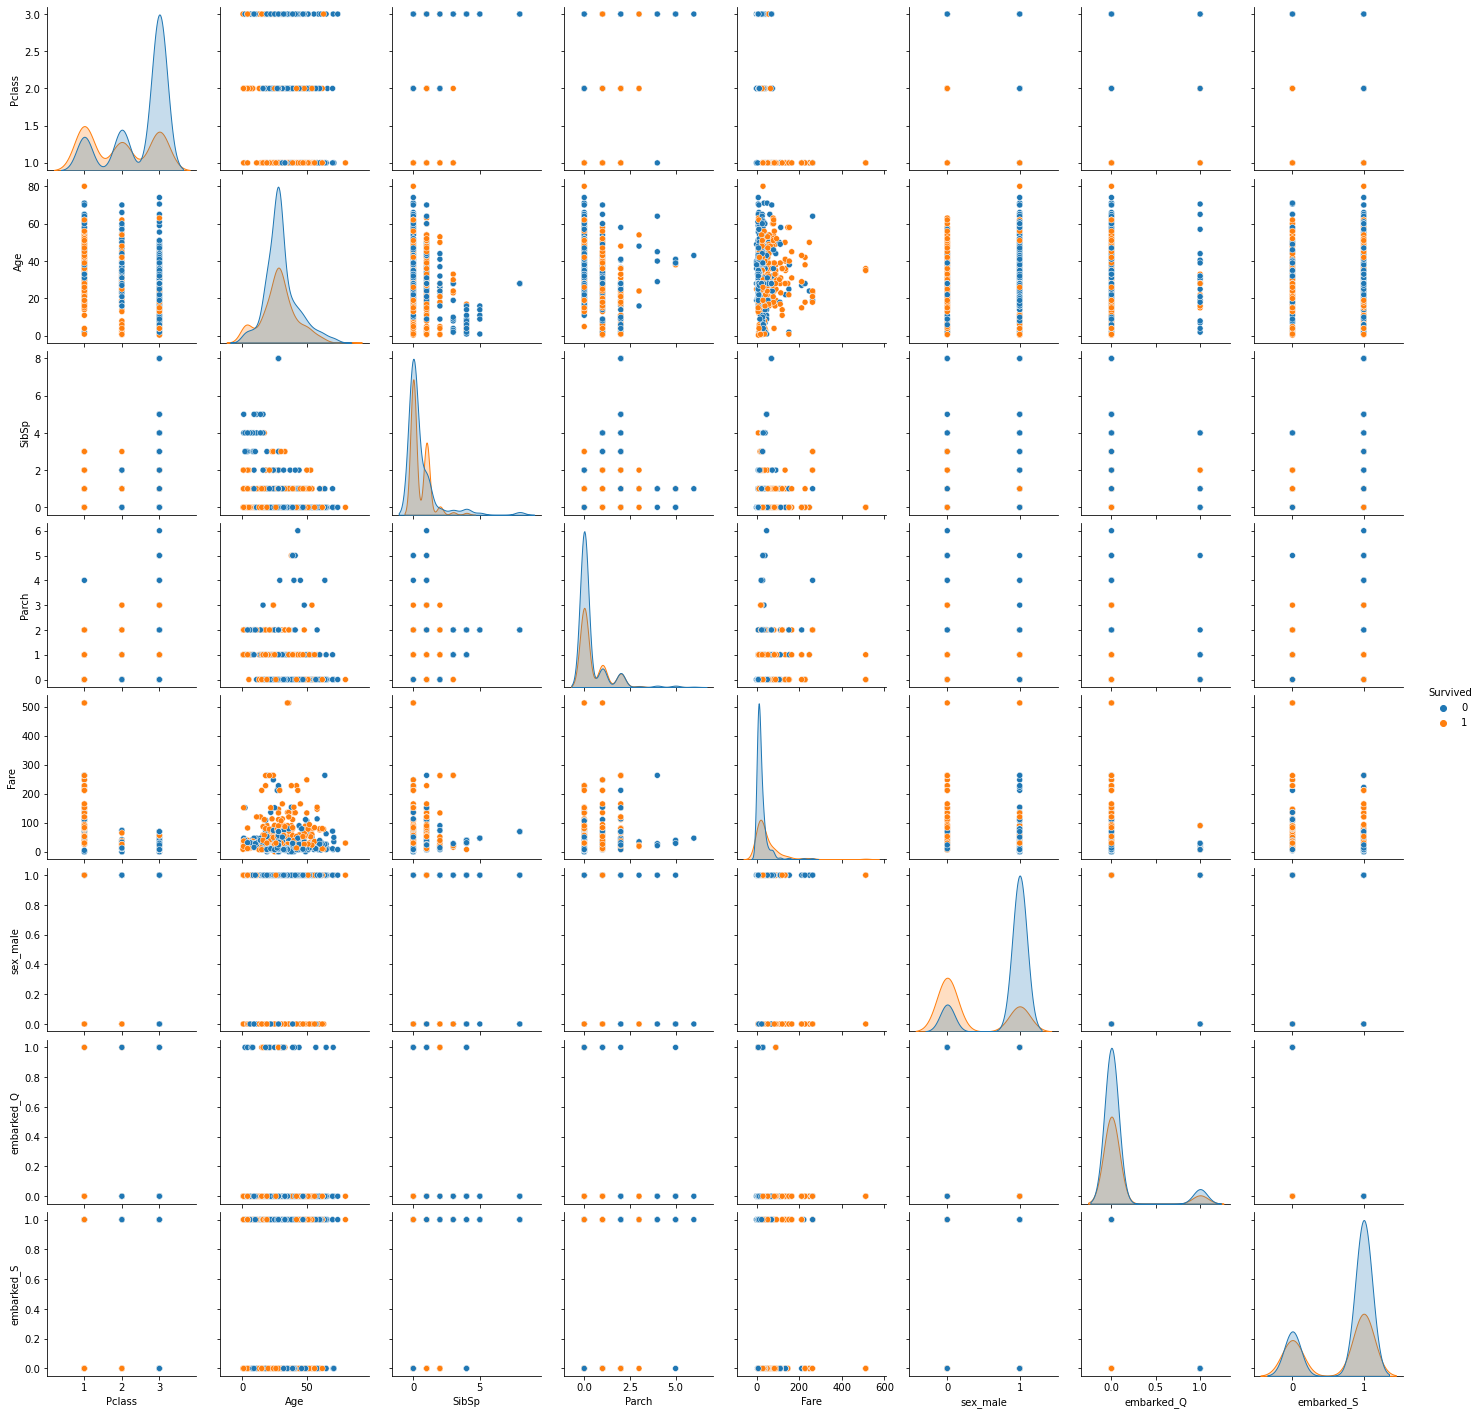

In [56]:
sns.pairplot(data=titanic, hue='Survived')

In [58]:
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
scores=[]
for k in range(1,100):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = 1 - float(sum(pred==y_test)) / len(y_test)
    scores.append([k,score])

<AxesSubplot:xlabel='k', ylabel='error'>

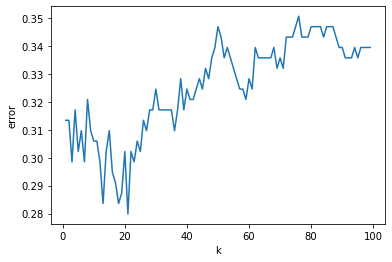

In [62]:
scores_df = pd.DataFrame(scores, columns=['k', 'error'])
sns.lineplot(x='k', y='error', data=scores_df)

In [63]:
scores_df[scores_df.error == scores_df.error.min()]

,k,error
20,21,0.279851


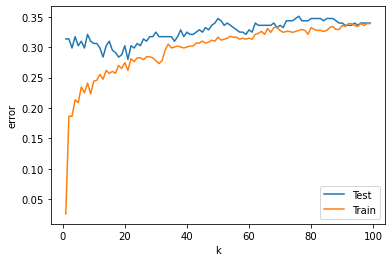

In [64]:
# Exploring both training and testing error

test_scores = []
train_scores = []

for k in range(1,100):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    test_pred = clf.predict(X_test)
    test_score = 1 - float(sum(test_pred==y_test)) / len(y_test)
    test_scores.append([k,test_score])
    
    train_pred = clf.predict(X_train)
    train_score = 1 - float(sum(train_pred==y_train)) / len(y_train)
    train_scores.append([k,train_score])

test_scores_df = pd.DataFrame(test_scores, columns=['k', 'error'])
sns.lineplot(x='k', y='error', data=test_scores_df)

train_scores_df = pd.DataFrame(train_scores, columns=['k', 'error'])
sns.lineplot(x='k', y='error', data=train_scores_df)

plt.legend(["Test", "Train"])

plt.show()

## KNN Conclusion

- Using K neighbours with a k of 21 gives the most accurate model.
- Still more to do including k-folds cross validation and trying other models
- The model is plateauing with more k so need to find better features

## Decision tree ensembles

In [74]:
# Example feature matrix (X)
X = titanic.drop('Fare', axis=1)

# Create response vector (y).
y = titanic['Fare']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

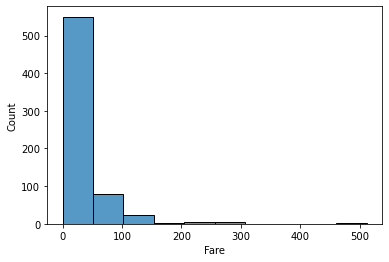

In [90]:
fig, axs = plt.
sns.histplot(y_train, bins=10)

In [82]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics

In [112]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(f'rmse: {metrics.mean_squared_error(y_test, linreg.predict(X_test), squared=False)}')
print(f'Train r^2 score: {linreg.score(X_train, y_train)}')
print(f'Test r^2 score: {linreg.score(X_test, y_test)}')

rmse: 32.259878409237146
Train r^2 score: 0.3797245760424558
Test r^2 score: 0.44952644415496634


In [110]:
forestreg = RandomForestRegressor(n_jobs=-1)
forestreg.fit(X_train, y_train)

print(f'rmse: {metrics.mean_squared_error(y_test, forestreg.predict(X_test), squared=False)}')
print(f'Train r^2 score: {forestreg.score(X_train, y_train)}')
print(f'Test r^2 score: {forestreg.score(X_test, y_test)}')

rmse: 36.74612158077921
Train r^2 score: 0.9024623231023932
Test r^2 score: 0.2857766840054772


In [155]:
model = RandomForestRegressor(n_estimators=1,max_depth=None,bootstrap=False,max_features=None)
model.fit(X_train,y_train)

model.score(X_train,y_train)

0.9730964329526955

In [156]:
model.score(X_test,y_test)

-0.14869226294543925

## Bagging (Bootstrap AGGregation)

In [157]:
model = RandomForestRegressor(n_estimators=10, random_state=16)
model.fit(X_train,y_train)

print ("Training Score:",model.score(X_train,y_train))
print ("Test Score:",model.score(X_test,y_test))

Training Score: 0.8556429699641677
Test Score: 0.4304456560438984


In [160]:
model.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=959027881),
 DecisionTreeRegressor(max_features='auto', random_state=1402977518),
 DecisionTreeRegressor(max_features='auto', random_state=99485817),
 DecisionTreeRegressor(max_features='auto', random_state=239174213),
 DecisionTreeRegressor(max_features='auto', random_state=217761089),
 DecisionTreeRegressor(max_features='auto', random_state=1325499003),
 DecisionTreeRegressor(max_features='auto', random_state=195858884),
 DecisionTreeRegressor(max_features='auto', random_state=597836157),
 DecisionTreeRegressor(max_features='auto', random_state=1549318559),
 DecisionTreeRegressor(max_features='auto', random_state=878166788)]

In [170]:
model = RandomForestRegressor(n_estimators=100, 
                              min_samples_leaf=5, 
                              max_features=0.5, 
                              random_state=42)
model.fit(X_train,y_train)

print ("Training Score:",model.score(X_train,y_train))
print ("Test Score:",model.score(X_test,y_test))

Training Score: 0.6059978374895578
Test Score: 0.49400082003908885


<AxesSubplot:>

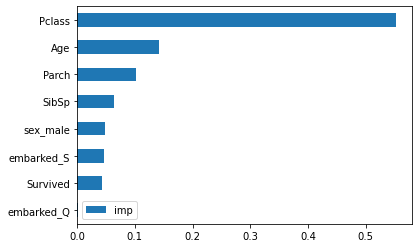

In [177]:
pd.DataFrame({'imp': model.feature_importances_
             }, index=X_train.columns).sort_values('imp', ascending = True).plot(kind='barh')

In [179]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_male,embarked_Q,embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,1,0,1
888,1,1,19.0,0,0,30.0000,0,0,1
889,0,3,28.0,1,2,23.4500,0,0,1


In [180]:
# Create feature matrix (X).
X = titanic.drop('Survived', axis=1)

# Create response vector (y).
y = titanic['Survived']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

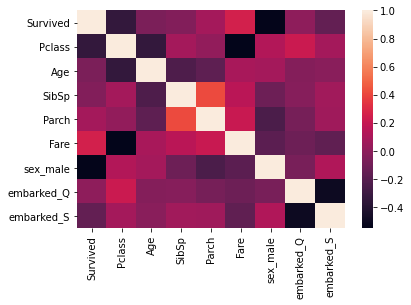

In [183]:
sns.heatmap(titanic.corr());

In [184]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train,y_train)
print ("Training Score:",model.score(X_train,y_train))
print ("Test Score:",model.score(X_test,y_test))

Training Score: 0.9805389221556886
Test Score: 0.7937219730941704


<AxesSubplot:>

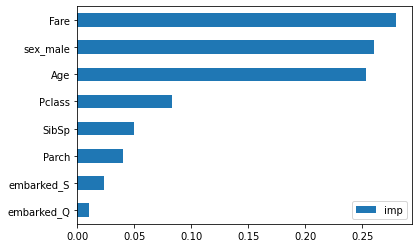

In [185]:
pd.DataFrame({'imp': model.feature_importances_
             }, index=X_train.columns).sort_values('imp', ascending = True).plot(kind='barh')